Nombre de los participantes Proyecto
Juan José Naranjo Velásquez CC : 1039474689
Kenneth David Leonel Triana CC: 1192817456

Librerias 

In [1]:
# Carga de librerias
from IPython.display import display
import subprocess as sp
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import random
import time
from datetime import datetime
import datetime
from scipy import stats
import statsmodels.api as sm
import holidays
import seaborn as sns
import matplotlib.pyplot as plt

d:\programasProgramacion\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Configuraciones básicas para el desarrollo

In [2]:

# Configurar parametros de pandas y matplotlib
pd.set_option('display.precision', 4)
%config IPCompleter.greedy=True
%matplotlib inline

params = {}
plt.rcParams.update(params)
params = {
           'legend.fontsize': 20,
           'legend.handlelength': 2,
           'axes.titlesize':'20',
           'xtick.labelsize':'20',
           'ytick.labelsize':'20'
         }

matplotlib.rcParams.update(params)

Unificar en archivos los datos de las diferentes estaciones

In [3]:

def unificar_archivos_excel(carpeta_principal, archivo_salida):
    # Lista para almacenar todos los dataframes
    dfs = []
    
    # Recorre todos los archivos en la carpeta principal y subcarpetas
    for root, dirs, files in os.walk(carpeta_principal):
        for file in files:
            if file.endswith('.csv') or file.endswith('.xlsx'):  # Verifica si es un archivo Excel
                archivo_actual = os.path.join(root, file)
                try:
                    # Lee el archivo Excel y agrega su contenido a la lista
                    df = pd.read_csv(archivo_actual)
                    dfs.append(df)
                except Exception as e:
                    print(f"No se pudo leer el archivo {archivo_actual}: {e}")

    # Si hay archivos leídos, unificarlos en un solo DataFrame
    if dfs:
        df_unificado = pd.concat(dfs, ignore_index=True)
        
        # Guardar el DataFrame unificado en un archivo Excel
        df_unificado.to_csv(archivo_salida, index=False)
        print(f"Archivos unificados en {archivo_salida}")
    else:
        print("No se encontraron archivos Excel.")

# Usar el script
carpeta_calidad = 'data/raw/calidad'  # Ruta a la carpeta principal
archivo_calidad = 'data/stage/unificado_calidad.csv'  # Nombre del archivo Excel de salida
df_calidad = unificar_archivos_excel(carpeta_calidad, archivo_calidad)

carpeta_humedad = 'data/raw/humedad'  # Ruta a la carpeta principal
archivo_humedad = 'data/stage/unificado_humedad.csv'  # Nombre del archivo Excel de salida
df_humedad = unificar_archivos_excel(carpeta_humedad, archivo_humedad)

carpeta_precipitacion = 'data/raw/precipitacion'  # Ruta a la carpeta principal
archivo_precipitacion = 'data/stage/unificado_precipitacion.csv'  # Nombre del archivo Excel de salida
df_precipitacion = unificar_archivos_excel(carpeta_precipitacion, archivo_precipitacion)

carpeta_presion = 'data/raw/presion'  # Ruta a la carpeta principal
archivo_presion = 'data/stage/unificado_presion.csv'  # Nombre del archivo Excel de salida
df_presion = unificar_archivos_excel(carpeta_presion, archivo_presion)

carpeta_temperatura = 'data/raw/temperatura'  # Ruta a la carpeta principal
archivo_temperatura = 'data/stage/unificado_temperatura.csv'  # Nombre del archivo Excel de salida
df_temperatura = unificar_archivos_excel(carpeta_temperatura, archivo_temperatura)

carpeta_vientos = 'data/raw/vientos'  # Ruta a la carpeta principal
archivo_vientos = 'data/stage/unificado_vientos.csv'  # Nombre del archivo Excel de salida
df_vientos = unificar_archivos_excel(carpeta_vientos, archivo_vientos)

Archivos unificados en data/stage/unificado_calidad.csv
Archivos unificados en data/stage/unificado_humedad.csv
Archivos unificados en data/stage/unificado_precipitacion.csv
Archivos unificados en data/stage/unificado_presion.csv
Archivos unificados en data/stage/unificado_temperatura.csv
Archivos unificados en data/stage/unificado_vientos.csv


Renombrar columna calidad en los diferentes archivos de calidad y metereológicos

In [4]:
# Ruta de la carpeta que contiene los archivos CSV
carpeta = "data/stage"

# Recorremos cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    # Verificamos que el archivo termine en .csv y empiece con "unificado_"
    if archivo.endswith(".csv") and archivo.startswith("unificado_"):
        ruta_completa = os.path.join(carpeta, archivo)
        # Leemos el CSV
        df = pd.read_csv(ruta_completa)
        
        # Extraemos el sufijo del nombre: lo que sigue a "unificado_" y antes de ".csv"
        sufijo = archivo[len("unificado_"):-len(".csv")]
        
        # Si existe la columna "Calidad", la renombramos
        if "Calidad" in df.columns:
            nuevo_nombre = f"calidad_{sufijo}"
            df.rename(columns={"Calidad": nuevo_nombre}, inplace=True)
            print(f"Archivo: {archivo} - Se renombró 'Calidad' a '{nuevo_nombre}'")
        else:
            print(f"Archivo: {archivo} - No se encontró la columna 'calidad'")
        
        # Guardamos el DataFrame modificado sobrescribiendo el archivo original (o puedes guardarlo con otro nombre)
        df.to_csv(ruta_completa, index=False)   


Archivo: unificado_calidad.csv - No se encontró la columna 'calidad'
Archivo: unificado_humedad.csv - Se renombró 'Calidad' a 'calidad_humedad'
Archivo: unificado_precipitacion.csv - Se renombró 'Calidad' a 'calidad_precipitacion'
Archivo: unificado_presion.csv - Se renombró 'Calidad' a 'calidad_presion'
Archivo: unificado_temperatura.csv - Se renombró 'Calidad' a 'calidad_temperatura'
Archivo: unificado_vientos.csv - Se renombró 'Calidad' a 'calidad_vientos'


Unificar en un Archivo todos los datos metereológicos

In [5]:
# Ruta de la carpeta que contiene los archivos CSV
carpeta = "data/stage"

# Lista de archivos a unir
archivos = [
    "unificado_humedad.csv",
    "unificado_precipitacion.csv",
    "unificado_presion.csv",
    "unificado_temperatura.csv",
    "unificado_vientos.csv"
]

# Inicializamos el dataframe final
df_merged = None

# Iteramos sobre cada archivo
for archivo in archivos:
    ruta_completa = os.path.join(carpeta, archivo)
    # Leemos el archivo CSV
    df_temp = pd.read_csv(ruta_completa)
    
    # Si es el primer archivo, lo asignamos directamente
    if df_merged is None:
        df_merged = df_temp
    else:
        # Realizamos un merge usando "fecha_hora" como llave, utilizando inner para conservar los registros por minuto
        df_merged = pd.merge(df_merged, df_temp, on="fecha_hora", how="left")
    print(f"Archivo {archivo} unido correctamente.")

df_merged = df_merged.drop_duplicates(subset=["fecha_hora"])

# Guardamos el dataset combinado en un nuevo archivo CSV
ruta_salida = os.path.join(carpeta, "dataset_completoMeteo.csv")
df_merged.to_csv(ruta_salida, index=False)
print("Dataset combinado guardado en:", ruta_salida)


Archivo unificado_humedad.csv unido correctamente.
Archivo unificado_precipitacion.csv unido correctamente.
Archivo unificado_presion.csv unido correctamente.
Archivo unificado_temperatura.csv unido correctamente.
Archivo unificado_vientos.csv unido correctamente.
Dataset combinado guardado en: data/stage\dataset_completoMeteo.csv


## Limpieza de datos Datos del SIATA

DataFrames de los datos 

In [3]:
calidadAire = pd.read_csv('data/stage/unificado_calidad.csv')
calidadAire.head()

,Fecha_Hora,codigoSerial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2023-07-01 00:00:00,83,5.9745,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
1,2023-07-01 01:00:00,83,16.6726,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
2,2023-07-01 02:00:00,83,23.8324,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
3,2023-07-01 03:00:00,83,14.2892,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
4,2023-07-01 04:00:00,83,20.2139,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


In [4]:
meteo = pd.read_csv('data/stage/dataset_completoMeteo.csv')
meteo.head()

,fecha_hora,Humedad,calidad_humedad,P1,P2,calidad_precipitacion,Presion,calidad_presion,Temperatura,calidad_temperatura,Velocidad_Prom,Velocidad_Max,Direccion_Prom,Direccion_Max,calidad_vientos
0,2023-07-01 00:00:00,74.0,1,0.0,0.0,1.0,851.0,1,22.37,1,1.69,2.9,20.0,21.0,1.0
1,2023-07-01 00:01:00,74.0,1,0.0,0.0,1.0,851.0,1,22.31,1,1.92,3.2,24.0,17.0,1.0
2,2023-07-01 00:02:00,74.0,1,0.0,0.0,1.0,851.0,1,22.30,1,0.99,2.2,44.0,38.0,1.0
3,2023-07-01 00:03:00,74.0,1,0.0,0.0,1.0,851.0,1,22.40,1,0.46,0.8,45.0,33.0,1.0
4,2023-07-01 00:04:00,74.0,1,0.0,0.0,1.0,851.0,1,22.50,1,0.41,1.0,11.0,37.0,1.0


Dejar columnas en minusculas

In [5]:
# nombres de caracteristicas en minusculas calidad aire y metereológicas
calidadAire.columns = calidadAire.columns.str.lower()
meteo.columns = meteo.columns.str.lower()

# Se visualiza solo esta apra corroborar que se dejo en minusculas
calidadAire.head()

,fecha_hora,codigoserial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2023-07-01 00:00:00,83,5.9745,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
1,2023-07-01 01:00:00,83,16.6726,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
2,2023-07-01 02:00:00,83,23.8324,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
3,2023-07-01 03:00:00,83,14.2892,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
4,2023-07-01 04:00:00,83,20.2139,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


Eliminación registros donde nuestra variable pm25 tenga valores -9999.0 que esto significa dato nulo
o que sean valores menores que 0

In [6]:
def eliminarRegistrosNulos(data,columna, valor):
    """
    Función para eliminar los valores nulos en una columna 
    estos son valores -999.0
    """
    # Nos quedamos con los valores que sean mayores a 0
    data = data[data[columna] > valor].reset_index(drop=True)
    return data

# Eliminar los valores nulos en la columna pm25
calidadAire = eliminarRegistrosNulos(calidadAire,'pm25', 0)
calidadAire.head()

,fecha_hora,codigoserial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2023-07-01 00:00:00,83,5.9745,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
1,2023-07-01 01:00:00,83,16.6726,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
2,2023-07-01 02:00:00,83,23.8324,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
3,2023-07-01 03:00:00,83,14.2892,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
4,2023-07-01 04:00:00,83,20.2139,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


In [7]:
#Corroboramos que ya nuestra columna pm25 que es la que necesitabamos cerciorarnos que no tuviera datos nulos
calidadAire['pm25'].min()

0.5

Función para convertir nuestro valores -999.0 o -9999.0 a nulos ya que estos no fueron tomados por los sensores del SIATA

In [8]:
#Función para pasar esos valores -999.0 o -9999.0 a NaN
def pasarDatosANulos(data,valor):
    """
    Función para pasar datos a valores nulos en un dataframe
    """
    # Reemplazamos los valores -999.0  u otro con NaN
    data = data.replace(valor, np.nan)
    return data

# Pasar los valores -999.0 y -9999.0 a NaN
meteo = pasarDatosANulos(meteo,-999.0)
print(f"Cantidad de registros en mi dataframe Metereológicos con los nulos : {len(meteo)}")

Cantidad de registros en mi dataframe Metereológicos con los nulos : 659520


In [9]:
meteo = meteo.dropna()
print(f"Revisión de cantidad registros en Presion Caldas con la eliminación nulos:{len(meteo)}")

Revisión de cantidad registros en Presion Caldas con la eliminación nulos:459676


Corroboración valores maximos y minimos de los datos de calidad

In [10]:
# se mira los calores maximos de cada columna de los dataframes
print(f"Ver valores maximo por todas las variables de nuestro dataset :\n{calidadAire.max()}\n")


Ver valores maximo por todas las variables de nuestro dataset :
fecha_hora              2024-09-30 23:00:00
codigoserial                             86
pm25                               115732.0
calidad_pm25                           4.32
pm10                                -9999.0
calidad_pm10                            1.0
pm1                                 -9999.0
calidad_pm1                             1.0
no                                  -9999.0
calidad_no                              1.0
no2                                 -9999.0
calidad_no2                             1.0
nox                                 -9999.0
calidad_nox                             1.0
ozono                               -9999.0
calidad_ozono                           1.0
co                                  -9999.0
calidad_co                              1.0
so2                                 -9999.0
calidad_so2                             1.0
pst                                 -9999.0
calidad_pst 

In [11]:
print(f"Ver valores minimos por todas las variables de nuestro dataset :\n{calidadAire.min()}")

Ver valores minimos por todas las variables de nuestro dataset :
fecha_hora              2023-07-01 00:00:00
codigoserial                             83
pm25                                    0.5
calidad_pm25                            1.0
pm10                                -9999.0
calidad_pm10                            1.0
pm1                                 -9999.0
calidad_pm1                             1.0
no                                  -9999.0
calidad_no                              1.0
no2                                 -9999.0
calidad_no2                             1.0
nox                                 -9999.0
calidad_nox                             1.0
ozono                               -9999.0
calidad_ozono                           1.0
co                                  -9999.0
calidad_co                              1.0
so2                                 -9999.0
calidad_so2                             1.0
pst                                 -9999.0
calidad_pst

Filtrar el dataframe calidad aire para tomar las columnas pertinentes ya que observamos que los datos del SIATA solo toma los valores de la particula pm25

In [12]:
def filtro_data(data):
    """"
    Función para tomar columnas de estudio en archivos de calidad del aire en las diferentes estaciones
    In[0]: dataset
    Out[0]: dataset filtrado hasta columna de estudio
    """
    # Filtrar los datos hasta el indice que se encuentra la partícula pm25
    datosFiltrados = data.iloc[:,:4]
    return datosFiltrados

# Filtrar los datos
calidadAireFiltrada = filtro_data(calidadAire)
calidadAireFiltrada.head()

,fecha_hora,codigoserial,pm25,calidad_pm25
0,2023-07-01 00:00:00,83,5.9745,1.0
1,2023-07-01 01:00:00,83,16.6726,1.0
2,2023-07-01 02:00:00,83,23.8324,1.0
3,2023-07-01 03:00:00,83,14.2892,1.0
4,2023-07-01 04:00:00,83,20.2139,1.0


Dado que los registros que se tienen por las características metereológicas se encuentran por minuto, debemos llevarlos a la estructura o base del dataset que almacena la calidad del aire bajo registros por dia, por ende, se realiza el promedio de los dataframes (Temperatura , precipitación, Vientos, Humedad, Presion) de las diferentes estaciones para homogeneizar la base final

#### Funcion para agregar columnas de las fechas

In [15]:

def agregarColumnas(data):
    """"
    Función para agregar columnas
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['anio'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.year
    dataTemporal['dia']= pd.to_datetime(dataTemporal['fecha_hora']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['fecha_hora']).dt.month
    #Si la granularidad fuera por horas
    # dataTemporal['hora'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.hour
    return dataTemporal

########### Función para sacar promedio ##################

def sacarPromedio(data,revision):
    """"
    Función para calcular el promedio de todas las columnas de un dataframe

    args:   data =  dataframe a utilizar
            nombrecolumna = característica a la cual se le realiza el promedio
            revision = indicador de revision (1,2,3) según las columnas de los dataframes
            1 si el dataframe contiene únicamente para nombre de columna y calidad
            2 si el dataframe contiene las columnas nombre de columna, calidad y codigo serial
            3 si el dataframe contiene las columnas nombre de columna, calidad y se aplican las demas características en este caso del viento

    In[0]: dataset
    Out[0]: promedio de cada columna
    """
    #Llamamos a la funcion agregarColumnas
    dataNuevo = agregarColumnas(data)
    #return dataNuevo
    #se saca el promedio de temperatura de la columna Temperatura
    if (revision ==1):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            'temperatura':'median',
            'humedad':'median',
            'presion':'median',
            'p1':'median',
            'calidad_humedad': lambda x: stats.mode(x)[0],
            'calidad_temperatura': lambda x: stats.mode(x)[0],
            'calidad_presion': lambda x: stats.mode(x)[0],
            'calidad_precipitacion': lambda x: stats.mode(x)[0],
            'calidad_vientos': lambda x: stats.mode(x)[0],
            'velocidad_prom': 'median',
            'velocidad_max':'median',
            'direccion_prom':'median',
            'direccion_max':'median'
        }).reset_index()
        return registroPromedio
    elif(revision ==2):
        registroPromedio = dataNuevo.groupby(['anio','mes','dia']).agg({
            f'pm25':'median',
            'calidad_pm25': lambda x: stats.mode(x)[0],
            'codigoserial': lambda x: stats.mode(x)[0]
        }).reset_index()
        return registroPromedio   

In [16]:
#Sacar promedio 
meteoPromedio = sacarPromedio(meteo,1)
meteoPromedio.head()

,anio,mes,dia,temperatura,humedad,presion,p1,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2023,7,1,24.875,65.000,849.435,0.0,1,1,1,1.0,1.0,0.90,1.8,143.5,182.0
1,2023,7,2,22.400,77.000,850.500,0.0,1,1,1,1.0,1.0,0.68,1.3,172.0,193.0
2,2023,7,3,21.545,82.095,851.940,0.0,1,1,1,1.0,1.0,0.43,0.8,164.0,197.0
3,2023,7,4,22.880,78.730,852.500,0.0,1,1,1,1.0,1.0,0.58,1.2,167.0,192.0
4,2023,7,5,22.300,79.680,851.140,0.0,1,1,1,1.0,1.0,0.82,1.6,155.0,187.0


In [17]:
#se saca el promedio de calidad del aire
calidadAirePromedio = sacarPromedio(calidadAireFiltrada,2)
calidadAirePromedio.head()

,anio,mes,dia,pm25,calidad_pm25,codigoserial
0,2023,7,1,10.7598,1.0,83
1,2023,7,2,14.3700,1.0,83
2,2023,7,3,12.1993,1.0,86
3,2023,7,4,14.4943,1.0,83
4,2023,7,5,12.6017,1.0,83


### Creación de columnas pertinentes para el estudio

##### Crear función para tener el día de la semana en una columna en cada dataframe

In [18]:
def definirDia(anio, mes, dia):
    """
    Función para definir el día de la semana
    args:   anio = año del dato
            mes = mes del dato
            dia = día del dato
    In[0]: año, mes, dia
    Out[0]: día de la semana en español
    """
    dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']
    # se crea un objeto de la fecha
    objetoFecha = datetime.date(int(anio), int(mes), int(dia))
    # obtener el índice del día de la semana %W -> Weekday (0 es Domingo, 6 es Sábado)
    indice_dia = int(objetoFecha.strftime("%w"))
    # obtener el nombre del día en español

    nombreDia = dias_semana[indice_dia]
        #Condicion para agrupar dias
    if  nombreDia == "Lunes" or nombreDia == "Martes" or nombreDia == "Miercoles":
        return "Inicio Semana"
    elif nombreDia == "Jueves" or nombreDia == "Viernes" :
        return "Media semana"
    elif nombreDia == "Sabado" or nombreDia == "Domingo":
        return "Fin de Semana"

In [19]:
#Se usa función
calidadAirePromedio['dia_semana'] = calidadAirePromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)
meteoPromedio['dia_semana'] = meteoPromedio.apply(lambda row: definirDia(row['anio'], row['mes'], row['dia']), axis=1)

# se muestran los primeros 5 datos
calidadAirePromedio.head()


,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana
0,2023,7,1,10.7598,1.0,83,Fin de Semana
1,2023,7,2,14.3700,1.0,83,Fin de Semana
2,2023,7,3,12.1993,1.0,86,Inicio Semana
3,2023,7,4,14.4943,1.0,83,Inicio Semana
4,2023,7,5,12.6017,1.0,83,Inicio Semana


### Se agrega columna categorica dependiendo del codigo serial 

In [20]:
def categoriaCodigoSerial(codigo):
    """
    Función para definir la categoría de calidad del aire
    args:   codigo = código serial de calidad del aire
    In[0]: código serial
    Out[0]: categoría de calidad del aire
    """
    if codigo == 28:
        return 'Estacion Itagui'
    elif codigo == 69:
        return 'Estacion Caldas'
    elif codigo == 86:
        return 'Estacion Aranjuez'
    elif codigo == 83:
        return 'Estacion Belen'

In [21]:

# # Aplicar la función a cada fila del DataFrame estación Itagui
calidadAirePromedio['estacion'] = calidadAirePromedio.apply(lambda row: categoriaCodigoSerial(row['codigoserial']), axis=1)
calidadAirePromedio.head()


,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion
0,2023,7,1,10.7598,1.0,83,Fin de Semana,Estacion Belen
1,2023,7,2,14.3700,1.0,83,Fin de Semana,Estacion Belen
2,2023,7,3,12.1993,1.0,86,Inicio Semana,Estacion Aranjuez
3,2023,7,4,14.4943,1.0,83,Inicio Semana,Estacion Belen
4,2023,7,5,12.6017,1.0,83,Inicio Semana,Estacion Belen


### Se crea una columna binaria sobre si ese dia fue festivo o no

In [22]:
# Obtener los festivos de Colombia con el indicador CO
festivosColombia = holidays.CO()

# Función para verificar si es festivo
def es_festivo(anio, mes, dia):
   
    fecha = datetime.date(int(anio), int(mes), int(dia))
    festivo = fecha in festivosColombia
    if festivo == True :
        return 1
    elif festivo == False :
        return 0

In [23]:
# # Aplicamos la función es_festivo
calidadAirePromedio['festivo'] = calidadAirePromedio.apply(lambda row: es_festivo(row['anio'], row['mes'], row['dia']), axis=1)
# resultado para ver que hubo festivo 
calidadAirePromedio.iloc[0:5]

,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion,festivo
0,2023,7,1,10.7598,1.0,83,Fin de Semana,Estacion Belen,0
1,2023,7,2,14.3700,1.0,83,Fin de Semana,Estacion Belen,0
2,2023,7,3,12.1993,1.0,86,Inicio Semana,Estacion Aranjuez,1
3,2023,7,4,14.4943,1.0,83,Inicio Semana,Estacion Belen,0
4,2023,7,5,12.6017,1.0,83,Inicio Semana,Estacion Belen,0


### Concatenar los dos datasets

In [24]:
def unirDatos(data1, data2):
    """"
    Función para unir dos dataframes
    In[0]: dataset1, dataset2
    Out[0]: dataset unido
    """
    return pd.merge(data1,data2,on=['anio','mes','dia','dia_semana'],how='inner')

In [25]:
#Unir los dataframes de la estación Itagui
dataSetcalidad = unirDatos(calidadAirePromedio,meteoPromedio)
#Se muestran los primeros 5 datos
dataSetcalidad.head()

,anio,mes,dia,pm25,calidad_pm25,codigoserial,dia_semana,estacion,festivo,temperatura,...,p1,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2023,7,1,10.7598,1.0,83,Fin de Semana,Estacion Belen,0,24.875,...,0.0,1,1,1,1.0,1.0,0.90,1.8,143.5,182.0
1,2023,7,2,14.3700,1.0,83,Fin de Semana,Estacion Belen,0,22.400,...,0.0,1,1,1,1.0,1.0,0.68,1.3,172.0,193.0
2,2023,7,3,12.1993,1.0,86,Inicio Semana,Estacion Aranjuez,1,21.545,...,0.0,1,1,1,1.0,1.0,0.43,0.8,164.0,197.0
3,2023,7,4,14.4943,1.0,83,Inicio Semana,Estacion Belen,0,22.880,...,0.0,1,1,1,1.0,1.0,0.58,1.2,167.0,192.0
4,2023,7,5,12.6017,1.0,83,Inicio Semana,Estacion Belen,0,22.300,...,0.0,1,1,1,1.0,1.0,0.82,1.6,155.0,187.0


### Revision variables

In [26]:
def eliminarColumnas(data, nombresColumnas):
    """
    Función para eliminar columnas en un dataframe
    """
    # Eliminar columnas que no sean necesarias
    data = data.drop(columns=nombresColumnas)
    return data

In [27]:
dataSetcalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anio                   329 non-null    int32  
 1   mes                    329 non-null    int32  
 2   dia                    329 non-null    int32  
 3   pm25                   329 non-null    float64
 4   calidad_pm25           329 non-null    float64
 5   codigoserial           329 non-null    int64  
 6   dia_semana             329 non-null    object 
 7   estacion               329 non-null    object 
 8   festivo                329 non-null    int64  
 9   temperatura            329 non-null    float64
 10  humedad                329 non-null    float64
 11  presion                329 non-null    float64
 12  p1                     329 non-null    float64
 13  calidad_humedad        329 non-null    int64  
 14  calidad_temperatura    329 non-null    int64  
 15  calida

Se detalla si hay nularidad de los datos

In [28]:
#Se mira nularidad en las variables 
dataSetcalidad.isnull().sum()

anio                     0
mes                      0
dia                      0
pm25                     0
calidad_pm25             0
codigoserial             0
dia_semana               0
estacion                 0
festivo                  0
temperatura              0
humedad                  0
presion                  0
p1                       0
calidad_humedad          0
calidad_temperatura      0
calidad_presion          0
calidad_precipitacion    0
calidad_vientos          0
velocidad_prom           0
velocidad_max            0
direccion_prom           0
direccion_max            0
dtype: int64

### Listado de nuestras variables 

Variables Categoricas

In [29]:
#Lista de variables categóricas
columnasCategoricas = dataSetcalidad.select_dtypes(include = ["object", 'category']).columns.tolist()
columnasCategoricas
dataSetcalidad[columnasCategoricas].head(3)

,dia_semana,estacion
0,Fin de Semana,Estacion Belen
1,Fin de Semana,Estacion Belen
2,Inicio Semana,Estacion Aranjuez


Variables Númericas

In [30]:
#Lista de variables numéricas
dataSetcalidad = eliminarColumnas(dataSetcalidad, "codigoserial")
columnasNumericas=dataSetcalidad.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
dataSetcalidad[columnasNumericas].head(3)

,anio,mes,dia,pm25,calidad_pm25,festivo,temperatura,humedad,presion,p1,calidad_humedad,calidad_temperatura,calidad_presion,calidad_precipitacion,calidad_vientos,velocidad_prom,velocidad_max,direccion_prom,direccion_max
0,2023,7,1,10.7598,1.0,0,24.875,65.000,849.435,0.0,1,1,1,1.0,1.0,0.90,1.8,143.5,182.0
1,2023,7,2,14.3700,1.0,0,22.400,77.000,850.500,0.0,1,1,1,1.0,1.0,0.68,1.3,172.0,193.0
2,2023,7,3,12.1993,1.0,1,21.545,82.095,851.940,0.0,1,1,1,1.0,1.0,0.43,0.8,164.0,197.0


Visualización variable pm25 en las diferentes estaciones

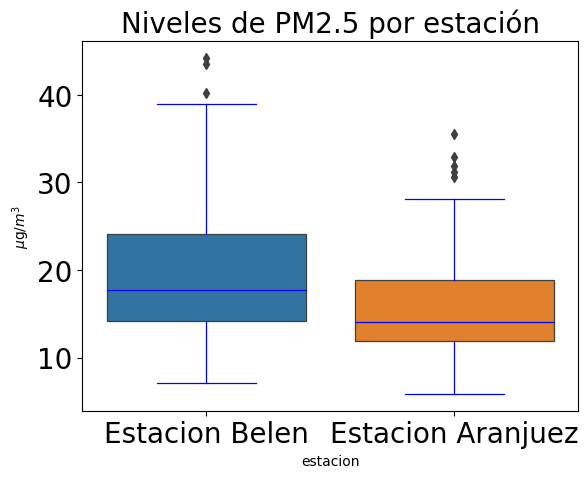

In [31]:
# Box Plot PM2.5 agrupado por estaciones
ax = sns.boxplot(x=dataSetcalidad['estacion'], y= dataSetcalidad['pm25'],  linewidth=0.9)
ax.set_title("Niveles de PM2.5 por estación")
plt.ylabel("$\mu$g/$m^3$")
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='blue')
plt.show()

Revisar valores atípicos